CNN nowcasting trainig curve


Training configuration:
  learning_rate: 0.0001
  batch_size: 32
  num_epochs: 50
  weight_decay: 0.0001
  scheduler_patience: 10
  early_stopping_patience: 15
  save_dir: models
  log_dir: logs
  image_dirs: ['/content/drive/MyDrive/data/processed/2019_01_15', '/content/drive/MyDrive/data/processed/2019_01_16', '/content/drive/MyDrive/data/processed/2019_01_17', '/content/drive/MyDrive/data/processed/2019_01_18', '/content/drive/MyDrive/data/processed/2019_01_19', '/content/drive/MyDrive/data/processed/2019_01_20']
  irradiance_files: ['/content/drive/MyDrive/GIRASOL_DATASET/2019_01_15/pyranometer/2019_01_15.csv', '/content/drive/MyDrive/GIRASOL_DATASET/2019_01_16/pyranometer/2019_01_16.csv', '/content/drive/MyDrive/GIRASOL_DATASET/2019_01_17/pyranometer/2019_01_17.csv', '/content/drive/MyDrive/GIRASOL_DATASET/2019_01_18/pyranometer/2019_01_18.csv', '/content/drive/MyDrive/GIRASOL_DATASET/2019_01_19/pyranometer/2019_01_19.csv', '/content/drive/MyDrive/GIRASOL_DATASET/2019_01_20/pyrano

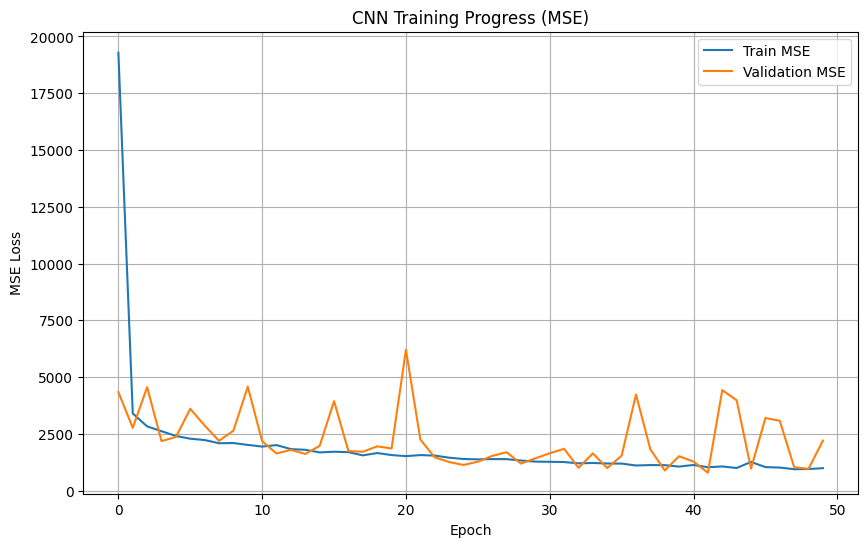

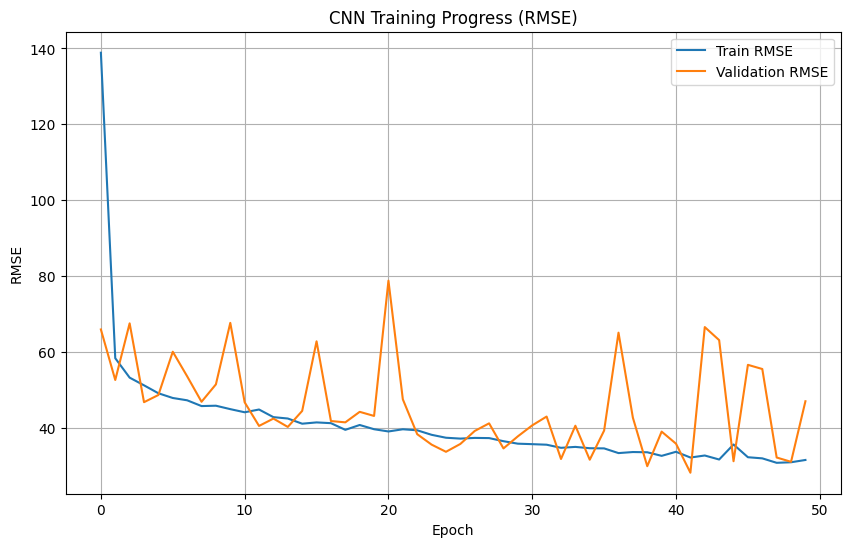

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open(r'D:\Projects\Hybrid CNN-LSTM for Solar Irradiance Forecasting\logs\cnn_training_history.json', 'r') as f:
    history = json.load(f)

train_losses = history['train_losses']  
val_losses = history['val_losses']
config = history['config']

train_rmse = np.sqrt(train_losses)
val_rmse = np.sqrt(val_losses)

print("Training configuration:")
for k, v in config.items():
    print(f"  {k}: {v}")

print(f"\nNumber of epochs: {len(train_losses)}")
print(f"Final Train MSE: {train_losses[-1]:.4f}, RMSE: {train_rmse[-1]:.4f}")
print(f"Final Validation MSE: {val_losses[-1]:.4f}, RMSE: {val_rmse[-1]:.4f}")
print(f"Minimum Validation MSE: {min(val_losses):.4f}, RMSE: {min(val_rmse):.4f}")
print(f"Minimum Training MSE: {min(train_losses):.4f}, RMSE: {min(train_rmse):.4f}")

# Plot MSE Loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train MSE')
plt.plot(val_losses, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('CNN Training Progress (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot RMSE
plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('CNN Training Progress (RMSE)')
plt.legend()
plt.grid(True)
plt.show()


Training configuration:
  sequence_length: 20
  forecast_horizon: 4
  learning_rate: 0.0001
  batch_size: 64
  num_epochs: 50
  lstm_hidden_size: 128
  lstm_num_layers: 2
  dropout: 0.2
  weight_decay: 0.0001
  scheduler_patience: 10
  early_stopping_patience: 15
  save_dir: models
  log_dir: logs
  irradiance_files: ['/content/drive/MyDrive/GIRASOL_DATASET/2019_01_15/pyranometer/2019_01_15.csv', '/content/drive/MyDrive/GIRASOL_DATASET/2019_01_16/pyranometer/2019_01_16.csv', '/content/drive/MyDrive/GIRASOL_DATASET/2019_01_17/pyranometer/2019_01_17.csv', '/content/drive/MyDrive/GIRASOL_DATASET/2019_01_18/pyranometer/2019_01_18.csv', '/content/drive/MyDrive/GIRASOL_DATASET/2019_01_19/pyranometer/2019_01_19.csv', '/content/drive/MyDrive/GIRASOL_DATASET/2019_01_20/pyranometer/2019_01_20.csv']

Number of epochs: 50
Final Train MSE: 1175.5708, RMSE: 34.2866
Final Validation MSE: 1166.1147, RMSE: 34.1484
Minimum Validation MSE: 1116.7151, RMSE: 33.4173
Minimum Training MSE: 1133.2117, RMSE: 3

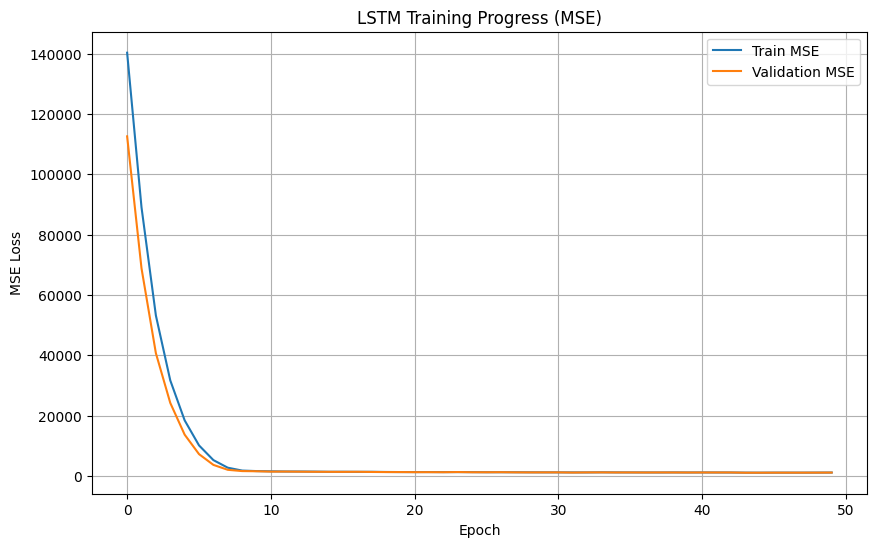

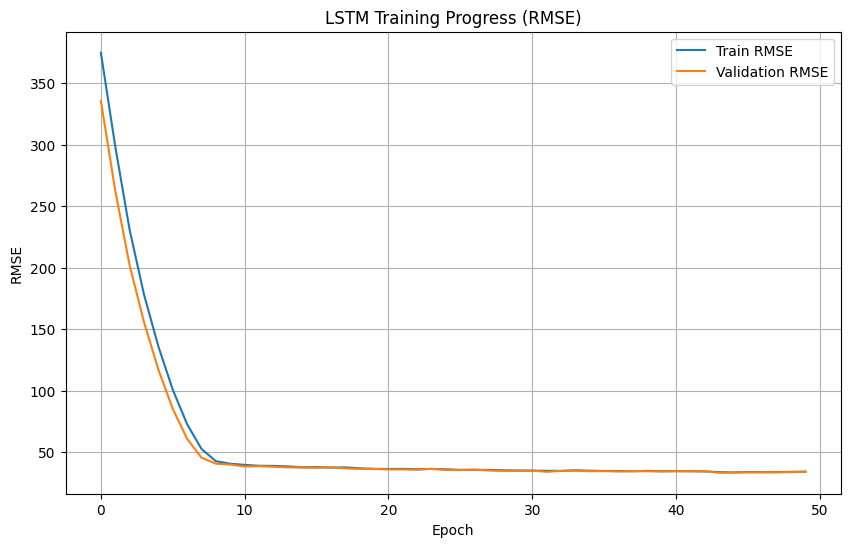

In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open(r'D:\Projects\Hybrid CNN-LSTM for Solar Irradiance Forecasting\logs\lstm_training_history.json', 'r') as f:
    history = json.load(f)

train_losses = history['train_losses']  
val_losses = history['val_losses']
config = history['config']

train_rmse = np.sqrt(train_losses)
val_rmse = np.sqrt(val_losses)

print("Training configuration:")
for k, v in config.items():
    print(f"  {k}: {v}")

print(f"\nNumber of epochs: {len(train_losses)}")
print(f"Final Train MSE: {train_losses[-1]:.4f}, RMSE: {train_rmse[-1]:.4f}")
print(f"Final Validation MSE: {val_losses[-1]:.4f}, RMSE: {val_rmse[-1]:.4f}")
print(f"Minimum Validation MSE: {min(val_losses):.4f}, RMSE: {min(val_rmse):.4f}")
print(f"Minimum Training MSE: {min(train_losses):.4f}, RMSE: {min(train_rmse):.4f}")

# Plot MSE Loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train MSE')
plt.plot(val_losses, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('LSTM Training Progress (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot RMSE
plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('LSTM Training Progress (RMSE)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from torch.utils.data import DataLoader
import json
from datetime import datetime

from scripts.cnn_model import SolarCNNRegression, SolarCNNWithFeatureExtraction
from scripts.lstm_model import SolarLSTMForecasting, HybridCNNLSTM
from scripts.solar_datasets import SolarIrradianceDataset, SolarTimeSeriesDataset, SolarSequenceDataset

class ModelEvaluator:
    """
    Comprehensive evaluation class for all models
    """

    def __init__(self, device=None):
        self.device = device or torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")

        self.results = {}

    def load_model(self, model_class, checkpoint_path, **kwargs):
        """Load a trained model from checkpoint"""
        model = model_class(**kwargs).to(self.device)
        checkpoint = torch.load(checkpoint_path, map_location=self.device)
        model.load_state_dict(checkpoint['model_state_dict'])
        model.eval()
        return model, checkpoint

    def evaluate_cnn(self, model_path, test_dataset):
        """Evaluate CNN nowcasting model"""
        print("\n=== Evaluating CNN Nowcasting Model ===")

        # Load model
        model, checkpoint = self.load_model(SolarCNNRegression, model_path)

        # Create test loader
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

        predictions = []
        targets = []

        with torch.no_grad():
            for images, batch_targets in test_loader:
                images, batch_targets = images.to(self.device), batch_targets.to(self.device)

                outputs = model(images)
                predictions.extend(outputs.squeeze().cpu().numpy())
                targets.extend(batch_targets.cpu().numpy())

        predictions = np.array(predictions)
        targets = np.array(targets)

        # Calculate metrics
        mse = mean_squared_error(targets, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(targets, predictions)
        r2 = r2_score(targets, predictions)

        # Store results
        self.results['cnn'] = {
            'rmse': rmse,
            'mae': mae,
            'r2': r2,
            'predictions': predictions.tolist(),
            'targets': targets.tolist(),
            'num_samples': len(predictions)
        }

        print(f"CNN Results:")
        print(f"  RMSE: {rmse:.2f} W/m²")
        print(f"  MAE: {mae:.2f} W/m²")
        print(f"  R²: {r2:.4f}")
        print(f"  Samples: {len(predictions)}")

        return rmse, mae, r2, predictions, targets

    def evaluate_lstm(self, model_path, test_dataset):
        """Evaluate LSTM forecasting model"""
        print("\n=== Evaluating LSTM Forecasting Model ===")

        # Load checkpoint to get config
        checkpoint = torch.load(model_path, map_location=self.device)
        config = checkpoint.get('config', {})

        # Load model
        model, _ = self.load_model(
            SolarLSTMForecasting, 
            model_path,
            input_size=1,
            hidden_size=config.get('lstm_hidden_size', 128),
            num_layers=config.get('lstm_num_layers', 2),
            output_size=config.get('forecast_horizon', 4)
        )

        # Create test loader
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

        all_predictions = []
        all_targets = []

        with torch.no_grad():
            for sequences, targets in test_loader:
                sequences, targets = sequences.to(self.device), targets.to(self.device)

                outputs = model(sequences)
                all_predictions.append(outputs.cpu().numpy())
                all_targets.append(targets.cpu().numpy())

        predictions = np.concatenate(all_predictions, axis=0)
        targets = np.concatenate(all_targets, axis=0)

        # Calculate overall metrics
        overall_rmse = np.sqrt(mean_squared_error(targets.flatten(), predictions.flatten()))
        overall_mae = mean_absolute_error(targets.flatten(), predictions.flatten())
        overall_r2 = r2_score(targets.flatten(), predictions.flatten())

        # Calculate per-step metrics
        forecast_horizon = predictions.shape[1]
        step_metrics = []

        for step in range(forecast_horizon):
            step_rmse = np.sqrt(mean_squared_error(targets[:, step], predictions[:, step]))
            step_mae = mean_absolute_error(targets[:, step], predictions[:, step])
            step_r2 = r2_score(targets[:, step], predictions[:, step])

            step_metrics.append({
                'step': step + 1,
                'rmse': step_rmse,
                'mae': step_mae,
                'r2': step_r2
            })

        # Store results
        self.results['lstm'] = {
            'overall_rmse': overall_rmse,
            'overall_mae': overall_mae,
            'overall_r2': overall_r2,
            'step_metrics': step_metrics,
            'predictions': predictions.tolist(),
            'targets': targets.tolist(),
            'num_samples': len(predictions)
        }

        print(f"LSTM Results:")
        print(f"  Overall RMSE: {overall_rmse:.2f} W/m²")
        print(f"  Overall MAE: {overall_mae:.2f} W/m²")
        print(f"  Overall R²: {overall_r2:.4f}")
        print(f"  Per-step RMSE: {[f'{m['rmse']:.2f}' for m in step_metrics]}")
        print(f"  Samples: {len(predictions)}")

        return overall_rmse, overall_mae, overall_r2, step_metrics, predictions, targets

    def evaluate_hybrid(self, model_path, test_dataset):
        """Evaluate hybrid CNN-LSTM model"""
        print("\n=== Evaluating Hybrid CNN-LSTM Model ===")

        # Load checkpoint to get config
        checkpoint = torch.load(model_path, map_location=self.device)
        config = checkpoint.get('config', {})

        # Load model
        model, _ = self.load_model(
            HybridCNNLSTM,
            model_path,
            sequence_length=config.get('sequence_length', 20),
            lstm_hidden_size=config.get('lstm_hidden_size', 128),
            forecast_horizon=config.get('forecast_horizon', 4)
        )

        # Create test loader
        test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)

        all_nowcast_pred = []
        all_nowcast_target = []
        all_forecast_pred = []
        all_forecast_target = []

        with torch.no_grad():
            for image_sequences, historical_irradiance, future_irradiance in test_loader:
                image_sequences = image_sequences.to(self.device)
                historical_irradiance = historical_irradiance.to(self.device)
                future_irradiance = future_irradiance.to(self.device)

                nowcasts, forecasts = model(image_sequences)

                all_nowcast_pred.append(nowcasts.squeeze(-1).cpu().numpy())
                all_nowcast_target.append(historical_irradiance.squeeze(-1).cpu().numpy())
                all_forecast_pred.append(forecasts.cpu().numpy())
                all_forecast_target.append(future_irradiance.cpu().numpy())

        nowcast_pred = np.concatenate(all_nowcast_pred, axis=0)
        nowcast_target = np.concatenate(all_nowcast_target, axis=0)
        forecast_pred = np.concatenate(all_forecast_pred, axis=0)
        forecast_target = np.concatenate(all_forecast_target, axis=0)

        # Nowcast metrics
        nowcast_rmse = np.sqrt(mean_squared_error(nowcast_target.flatten(), nowcast_pred.flatten()))
        nowcast_mae = mean_absolute_error(nowcast_target.flatten(), nowcast_pred.flatten())
        nowcast_r2 = r2_score(nowcast_target.flatten(), nowcast_pred.flatten())

        # Forecast metrics
        forecast_rmse = np.sqrt(mean_squared_error(forecast_target.flatten(), forecast_pred.flatten()))
        forecast_mae = mean_absolute_error(forecast_target.flatten(), forecast_pred.flatten())
        forecast_r2 = r2_score(forecast_target.flatten(), forecast_pred.flatten())

        # Per-step forecast metrics
        forecast_horizon = forecast_pred.shape[1]
        forecast_step_metrics = []

        for step in range(forecast_horizon):
            step_rmse = np.sqrt(mean_squared_error(forecast_target[:, step], forecast_pred[:, step]))
            step_mae = mean_absolute_error(forecast_target[:, step], forecast_pred[:, step])
            step_r2 = r2_score(forecast_target[:, step], forecast_pred[:, step])

            forecast_step_metrics.append({
                'step': step + 1,
                'rmse': step_rmse,
                'mae': step_mae,
                'r2': step_r2
            })

        # Store results
        self.results['hybrid'] = {
            'nowcast_rmse': nowcast_rmse,
            'nowcast_mae': nowcast_mae,
            'nowcast_r2': nowcast_r2,
            'forecast_rmse': forecast_rmse,
            'forecast_mae': forecast_mae,
            'forecast_r2': forecast_r2,
            'forecast_step_metrics': forecast_step_metrics,
            'num_samples': len(forecast_pred)
        }

        print(f"Hybrid Results:")
        print(f"  Nowcast RMSE: {nowcast_rmse:.2f} W/m²")
        print(f"  Nowcast MAE: {nowcast_mae:.2f} W/m²")
        print(f"  Nowcast R²: {nowcast_r2:.4f}")
        print(f"  Forecast RMSE: {forecast_rmse:.2f} W/m²")
        print(f"  Forecast MAE: {forecast_mae:.2f} W/m²")
        print(f"  Forecast R²: {forecast_r2:.4f}")
        print(f"  Per-step Forecast RMSE: {[f'{m['rmse']:.2f}' for m in forecast_step_metrics]}")
        print(f"  Samples: {len(forecast_pred)}")

        return (nowcast_rmse, nowcast_mae, forecast_rmse, forecast_mae, 
                forecast_step_metrics, nowcast_pred, forecast_pred)

    def plot_results(self, save_dir='evaluation_plots'):
        """Create visualization plots"""
        os.makedirs(save_dir, exist_ok=True)

        # CNN scatter plot
        if 'cnn' in self.results:
            plt.figure(figsize=(10, 8))

            targets = np.array(self.results['cnn']['targets'])
            predictions = np.array(self.results['cnn']['predictions'])

            plt.subplot(2, 2, 1)
            plt.scatter(targets, predictions, alpha=0.6, s=20)
            plt.plot([targets.min(), targets.max()], [targets.min(), targets.max()], 'r--', lw=2)
            plt.xlabel('Actual Irradiance (W/m²)')
            plt.ylabel('Predicted Irradiance (W/m²)')
            plt.title(f'CNN Nowcasting (RMSE: {self.results["cnn"]["rmse"]:.2f} W/m²)')
            plt.grid(True, alpha=0.3)

            # Residuals plot
            plt.subplot(2, 2, 2)
            residuals = predictions - targets
            plt.scatter(targets, residuals, alpha=0.6, s=20)
            plt.axhline(y=0, color='r', linestyle='--')
            plt.xlabel('Actual Irradiance (W/m²)')
            plt.ylabel('Residuals (W/m²)')
            plt.title('CNN Residuals')
            plt.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.savefig(f'{save_dir}/cnn_evaluation.png', dpi=300, bbox_inches='tight')
            plt.close()

        # LSTM step-wise performance
        if 'lstm' in self.results:
            step_metrics = self.results['lstm']['step_metrics']
            steps = [m['step'] for m in step_metrics]
            rmse_values = [m['rmse'] for m in step_metrics]
            mae_values = [m['mae'] for m in step_metrics]

            plt.figure(figsize=(12, 6))

            plt.subplot(1, 2, 1)
            plt.bar(steps, rmse_values, color='skyblue', alpha=0.7)
            plt.xlabel('Forecast Step')
            plt.ylabel('RMSE (W/m²)')
            plt.title('LSTM Forecast RMSE by Step')
            plt.grid(True, alpha=0.3)

            plt.subplot(1, 2, 2)
            plt.bar(steps, mae_values, color='lightcoral', alpha=0.7)
            plt.xlabel('Forecast Step')
            plt.ylabel('MAE (W/m²)')
            plt.title('LSTM Forecast MAE by Step')
            plt.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.savefig(f'{save_dir}/lstm_evaluation.png', dpi=300, bbox_inches='tight')
            plt.close()

        # Model comparison
        if len(self.results) > 1:
            plt.figure(figsize=(12, 8))

            models = []
            rmse_values = []
            mae_values = []

            if 'cnn' in self.results:
                models.append('CNN\nNowcasting')
                rmse_values.append(self.results['cnn']['rmse'])
                mae_values.append(self.results['cnn']['mae'])

            if 'lstm' in self.results:
                models.append('LSTM\nForecasting')
                rmse_values.append(self.results['lstm']['overall_rmse'])
                mae_values.append(self.results['lstm']['overall_mae'])

            if 'hybrid' in self.results:
                models.append('Hybrid\nNowcast')
                rmse_values.append(self.results['hybrid']['nowcast_rmse'])
                mae_values.append(self.results['hybrid']['nowcast_mae'])

                models.append('Hybrid\nForecast')
                rmse_values.append(self.results['hybrid']['forecast_rmse'])
                mae_values.append(self.results['hybrid']['forecast_mae'])

            x = np.arange(len(models))
            width = 0.35

            plt.subplot(1, 1, 1)
            plt.bar(x - width/2, rmse_values, width, label='RMSE', color='skyblue', alpha=0.8)
            plt.bar(x + width/2, mae_values, width, label='MAE', color='lightcoral', alpha=0.8)

            plt.xlabel('Models')
            plt.ylabel('Error (W/m²)')
            plt.title('Model Performance Comparison')
            plt.xticks(x, models)
            plt.legend()
            plt.grid(True, alpha=0.3)

            # Add value labels on bars
            for i, (rmse, mae) in enumerate(zip(rmse_values, mae_values)):
                plt.text(i - width/2, rmse + 1, f'{rmse:.1f}', ha='center', va='bottom')
                plt.text(i + width/2, mae + 1, f'{mae:.1f}', ha='center', va='bottom')

            plt.tight_layout()
            plt.savefig(f'{save_dir}/model_comparison.png', dpi=300, bbox_inches='tight')
            plt.close()

        print(f"\nPlots saved to {save_dir}/")

    def save_results(self, filename='evaluation_results.json'):
        """Save evaluation results to JSON"""
        results_with_metadata = {
            'evaluation_timestamp': datetime.now().isoformat(),
            'device': str(self.device),
            'results': self.results
        }

        with open(filename, 'w') as f:
            json.dump(results_with_metadata, f, indent=2)

        print(f"\nResults saved to {filename}")

    def generate_report(self, filename='evaluation_report.txt'):
        """Generate a comprehensive text report"""
        with open(filename, 'w') as f:
            f.write("="*80 + "\n")
            f.write("SOLAR IRRADIANCE FORECASTING - MODEL EVALUATION REPORT\n")
            f.write("="*80 + "\n")
            f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Device: {self.device}\n\n")

            if 'cnn' in self.results:
                f.write("CNN NOWCASTING MODEL\n")
                f.write("-" * 30 + "\n")
                r = self.results['cnn']
                f.write(f"RMSE: {r['rmse']:.2f} W/m²\n")
                f.write(f"MAE: {r['mae']:.2f} W/m²\n")
                f.write(f"R²: {r['r2']:.4f}\n")
                f.write(f"Samples: {r['num_samples']}\n\n")

            if 'lstm' in self.results:
                f.write("LSTM FORECASTING MODEL\n")
                f.write("-" * 30 + "\n")
                r = self.results['lstm']
                f.write(f"Overall RMSE: {r['overall_rmse']:.2f} W/m²\n")
                f.write(f"Overall MAE: {r['overall_mae']:.2f} W/m²\n")
                f.write(f"Overall R²: {r['overall_r2']:.4f}\n")
                f.write("Per-step Performance:\n")
                for m in r['step_metrics']:
                    f.write(f"  Step {m['step']}: RMSE={m['rmse']:.2f}, MAE={m['mae']:.2f}, R²={m['r2']:.4f}\n")
                f.write(f"Samples: {r['num_samples']}\n\n")

            if 'hybrid' in self.results:
                f.write("HYBRID CNN-LSTM MODEL\n")
                f.write("-" * 30 + "\n")
                r = self.results['hybrid']
                f.write("Nowcasting Performance:\n")
                f.write(f"  RMSE: {r['nowcast_rmse']:.2f} W/m²\n")
                f.write(f"  MAE: {r['nowcast_mae']:.2f} W/m²\n")
                f.write(f"  R²: {r['nowcast_r2']:.4f}\n")
                f.write("Forecasting Performance:\n")
                f.write(f"  RMSE: {r['forecast_rmse']:.2f} W/m²\n")
                f.write(f"  MAE: {r['forecast_mae']:.2f} W/m²\n")
                f.write(f"  R²: {r['forecast_r2']:.4f}\n")
                f.write("Per-step Forecast Performance:\n")
                for m in r['forecast_step_metrics']:
                    f.write(f"  Step {m['step']}: RMSE={m['rmse']:.2f}, MAE={m['mae']:.2f}, R²={m['r2']:.4f}\n")
                f.write(f"Samples: {r['num_samples']}\n\n")

        print(f"Report saved to {filename}")


def run_comprehensive_evaluation():
    """Run evaluation on all available models"""
    evaluator = ModelEvaluator()

    # Paths to trained models
    model_paths = {
        'cnn': 'models/best_cnn_model.pth',
        'lstm': 'models/best_lstm_model.pth',
        'hybrid': 'models/best_hybrid_model.pth'
    }

    # Test data configuration
    test_config = {
        'image_dir': 'data/processed/test',  # Adjust path as needed
        'irradiance_file': 'GIRASOL_DATASET/test/pyranometer/test.csv',  # Adjust path as needed
        'sequence_length': 20,
        'forecast_horizon': 4
    }

    # Evaluate CNN if available
    if os.path.exists(model_paths['cnn']) and os.path.exists(test_config['image_dir']):
        print("Preparing CNN test dataset...")
        cnn_test_dataset = SolarIrradianceDataset(
            image_dir=test_config['image_dir'],
            irradiance_file=test_config['irradiance_file']
        )
        evaluator.evaluate_cnn(model_paths['cnn'], cnn_test_dataset)

    # Evaluate LSTM if available
    if os.path.exists(model_paths['lstm']) and os.path.exists(test_config['irradiance_file']):
        print("Preparing LSTM test dataset...")
        lstm_test_dataset = SolarTimeSeriesDataset(
            irradiance_file=test_config['irradiance_file'],
            sequence_length=test_config['sequence_length'],
            forecast_horizon=test_config['forecast_horizon']
        )
        evaluator.evaluate_lstm(model_paths['lstm'], lstm_test_dataset)

    # Evaluate Hybrid if available
    if (os.path.exists(model_paths['hybrid']) and 
        os.path.exists(test_config['image_dir']) and 
        os.path.exists(test_config['irradiance_file'])):
        print("Preparing Hybrid test dataset...")
        hybrid_test_dataset = SolarSequenceDataset(
            image_dir=test_config['image_dir'],
            irradiance_file=test_config['irradiance_file'],
            sequence_length=test_config['sequence_length'],
            forecast_horizon=test_config['forecast_horizon']
        )
        evaluator.evaluate_hybrid(model_paths['hybrid'], hybrid_test_dataset)

    # Generate outputs
    evaluator.plot_results()
    evaluator.save_results()
    evaluator.generate_report()

    print("\n=== Evaluation Complete ===")
    print("Check the following files:")
    print("- evaluation_results.json (detailed metrics)")
    print("- evaluation_report.txt (summary report)")
    print("- evaluation_plots/ (visualization plots)")


if __name__ == '__main__':
    run_comprehensive_evaluation()
